In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

House Price Prediction
=======================

## 00. Abstract
This study focuses on predicting house prices using the "House Prices - Advanced Regression Techniques" dataset from Kaggle, employing a suite of linear and non-linear regression models. Our methodology encompassed key preprocessing steps: post-Lasso feature selection, standardization, and One-Hot Encoding to handle categorical variables effectively. The models applied in this analysis were Linear Regression, Lasso, Ridge, Elastic Net, and Support Vector Machine (SVM).

The performance of each model was rigorously assessed based on two primary metrics: Mean Squared Error (MSE) and R-Squared (R²). The results were as follows: The Linear Regression model showed an MSE of 0.013932 and an R² of 0.885240, demonstrating a solid baseline for performance. The Lasso regression, benefiting from post-Lasso feature selection, achieved a marginally better MSE of 0.013429 and an R² of 0.889384. Ridge regression posted an MSE of 0.013825 and an R² of 0.886124, indicating its reliability in handling multicollinearity among predictor variables.

Further, the Elastic Net model, which combines features of both Lasso and Ridge, recorded an MSE of 0.013514 and an R² of 0.888686. This outcome suggests its effectiveness in model regularization and feature selection. Notably, the SVM model outperformed the other techniques, yielding the lowest MSE of 0.012983 and the highest R² of 0.893061. This superior performance underscores SVM's robustness in capturing complex, non-linear relationships within the dataset.

These findings highlight the nuanced strengths of each regression model in the context of house price prediction. They also emphasize the importance of appropriate feature selection and data preprocessing methods like standardization and encoding in enhancing model performance. The comparative success of the SVM model particularly underlines the potential of more sophisticated, non-linear models in predictive accuracy for real estate market analysis.

**Tools / Libraries**: Python / Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn
<br/>
**Dataset**: Kaggle Competition - House Prices - Advanced Regression Techniques
<br/>
**Data Preprocessing**: Feature Selection using "Post-Lasso", One-Hot Encoding, Standardization
<br/>
**Analysis Performed**: Correlation, Linear Regression, Lasso, Ridge, Elastic Net, Support Vector Machine

In [ ]:
df = pd.read_csv('train.csv')
df.shape # 1460 Columns, 81 Rows

(1460, 81)

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 01. Data Preprocessing
### 01) Null Vallues

In [ ]:
df_na = df.isna().sum().to_frame().reset_index()
df_na.columns = ["Column Name", "Null Count"]
df_na["Null Percentage"] = round((df_na["Null Count"] / len(df))*100, 2)
df_na

,Column Name,Null Count,Null Percentage
0,Id,0,0.00
1,MSSubClass,0,0.00
2,MSZoning,0,0.00
3,LotFrontage,259,17.74
4,LotArea,0,0.00
...,...,...,...
76,MoSold,0,0.00
77,YrSold,0,0.00
78,SaleType,0,0.00
79,SaleCondition,0,0.00


In [ ]:
df_many_na_columns = df_na[df_na["Null Count"] >= 200]["Column Name"].tolist()
df_many_na_columns

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
df_v1 = df.drop(columns=df_many_na_columns, axis=1)
df_v1.shape # 1460 Rows 74 Columns (81 Columns -> 74 Columns)

(1460, 75)

In [ ]:
df_few_na_columns = df_na[(df_na["Null Count"] < 200) & (df_na["Null Count"] > 0)]["Column Name"].tolist()
df_na[df_na["Column Name"].isin(df_few_na_columns)]

,Column Name,Null Count,Null Percentage
25,MasVnrType,8,0.55
26,MasVnrArea,8,0.55
30,BsmtQual,37,2.53
31,BsmtCond,37,2.53
32,BsmtExposure,38,2.60
33,BsmtFinType1,37,2.53
35,BsmtFinType2,38,2.60
42,Electrical,1,0.07
58,GarageType,81,5.55
59,GarageYrBlt,81,5.55


In [ ]:
df_v2 = df_v1.dropna()
df_v2.shape # 1338 Rows 74 Columns (1460 Rows -> 1338 Rows)

(1338, 75)

### 02) Useless Columns
#### [01] Id
Id Column did not contain meaningful value since it was solely for "Numbering" the observations (rows).

In [ ]:
df_v3 = df_v2.drop("Id", axis=1)
df_v3.shape # 1338 Rows 73 Columns (75 Columns -> 73 Columns)

(1338, 74)

#### [02] Utilities
Vast majority of observations are in "AllPub", meaning that this column couldn't contribute to our model.
<br/>Thus, we dropped this column.

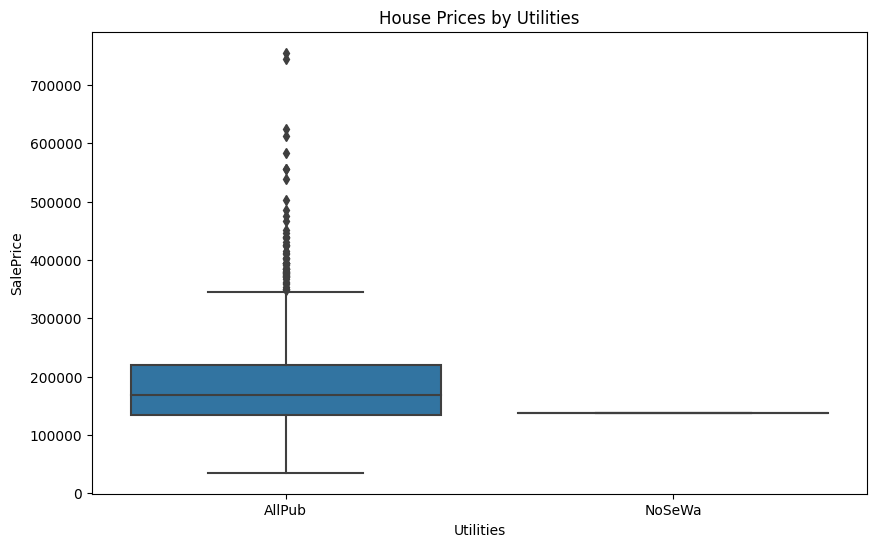

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_v3, x="Utilities", y="SalePrice")
plt.title("House Prices by Utilities")
plt.show()

In [ ]:
df_v4 = df_v3.drop("Utilities", axis = 1)
df_v4.shape # 1338 Rows 72 Columns (74 Columns -> 72 Columns)

(1338, 73)

### 03) Outliers
Removing outliers for every variable could lead to significant decrease in the size of dataset, hence we decided to remove outliers from our dependent variable.

In [ ]:
print(df_v4.sort_values(by="SalePrice", ascending=False)["SalePrice"].head(10))

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64


In [ ]:
print(df_v4.sort_values(by="SalePrice", ascending=True)["SalePrice"].head(10))

916     35311
30      40000
812     55993
1380    58500
410     60000
1100    60000
462     62383
1432    64500
874     66500
398     67000
Name: SalePrice, dtype: int64


In [ ]:
expensive_top2 = df_v4.sort_values(by="SalePrice", ascending=False).head(2).index
cheap_top2 = df_v4.sort_values(by="SalePrice", ascending=True).head(2).index
drop_index = expensive_top2.union(cheap_top2)

df_v5 = df_v4.drop(drop_index)
df_v5.shape # 1334 Rows 72 Columns (1338 Rows -> 1334 Rows)

### 04) Correlation Matrix

In [ ]:
# Numerical Variables
numerical_columns = df_v5.select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)
print(len(numerical_columns)) # 36 Columns

In [ ]:
corr_matrix = df_v5[numerical_columns].corr()

Pearson Coefficient with the value less than 0.2 is considered to be tricial correlation, so that we decided to remove the variables with low coefficient to enhance our model.

In [ ]:
# Low Correaltion ( < 0.2)
low_corr = corr_matrix[corr_matrix["SalePrice"].abs() < 0.2].index.tolist()
print(low_corr)
print(len(low_corr)) # 15 Columns

In [ ]:
df_v6 = df_v5.drop(columns=low_corr, axis=1)
df_v6.shape # 1334 Rows 57 Columns (73 Columns -> 57 Columns)

In an analysis of **multicollinearity** within a housing dataset, high correlations (Pearson's correlation coefficient above 0.8) were identified between three pairs of independent variables. To address this, the variable in each pair with the lower correlation to the sale price (SalePrice) was removed. The pairs and their likely reasons for multicollinearity are summarized as follows:

**TotalBsmtSF and 1stFlrSF (Correlation: 0.83)**
<br/>TotalBsmtSF: Total square feet of basement area.
1stFlrSF: First floor square feet.
The high correlation is logical since the area of the first floor (1stFlrSF) is often similar or identical to the basement area (TotalBsmtSF), especially in houses where the basement covers the entire footprint of the first floor.
GarageYrBlt and YearBuilt (Correlation: 0.82)

**YearBuilt: Original construction date.**
<br/>GarageYrBlt: Year garage was built.
This correlation is reasonable because garages are typically built at the same time as the house, leading to a close association between the construction year of the house (YearBuilt) and the year the garage was built (GarageYrBlt).
TotRmsAbvGrd and GrLivArea (Correlation: 0.83)

**TotRmsAbvGrd: Total rooms above grade (excluding bathrooms).**
<br/>GrLivArea: Above grade (ground) living area square feet.
The correlation here can be explained by the fact that a larger living area (GrLivArea) usually contains more rooms (TotRmsAbvGrd). Hence, as the living area increases, the number of rooms above grade typically increases as well.

In [ ]:
# high Correlation ( >= 0.2)
high_corr = corr_matrix[corr_matrix["SalePrice"].abs() >= 0.2].index.tolist()
print(high_corr)
print(len(high_corr)) # 21 Columns

In [ ]:
high_correlation = df_v6[high_corr].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(high_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("High Correlation Heatmap")
plt.show()

In [ ]:
df_v7 = df_v6.drop(columns=["TotalBsmtSF", "GarageYrBlt", "TotRmsAbvGrd"], axis=1)
df_v7.shape # 1334 Rows 54 Columns (58 columns -> 54 columns)

### 05) Log Transformation - Dependent Variable

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_v7["SalePrice"], kde=True, bins=50)
plt.title("Distribution of SalePrice")
plt.grid(True)
plt.show()

# Right-Skewed

In [ ]:
df_v7["Log_SalePrice"] = np.log(df_v7["SalePrice"])
df_v7.shape # 1334 Rows 55 Columns (54 Columns -> 55 Columns)

In [ ]:
# After Log Transformation
plt.figure(figsize=(10,6))
sns.histplot(df_v7["Log_SalePrice"], kde=True, bins=50)
plt.title("Distribution of Log_SalePrice")
plt.grid(True)
plt.show()

### 06) One-Hot Encoing (Creating Dummy Variables)

In [ ]:
# Categorical Variables
categorical_columns = df_v7.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns)) # 36

In [ ]:
df_v8 = pd.get_dummies(df_v7, columns=categorical_columns, drop_first=True)
df_v8.shape # 1334 Rows 206 Columns (56 Columns -> 206 Columns)

## 02. Post Lasso

**"Post Lasso"** is a methodology used in linear regression analysis, particularly effective in high-dimensional datasets with a large number of potential predictors. It encompasses a two-step process aimed at improving model accuracy and interpretability.

The first step involves applying Lasso (Least Absolute Shrinkage and Selection Operator) regression, which integrates both variable selection and regularization. Lasso's key feature is its penalty on the absolute size of coefficients, leading to some coefficients being entirely reduced to zero. This attribute allows Lasso to exclude irrelevant variables, thus selecting a more manageable subset of significant predictors from a vast array.

The subsequent step is refitting a traditional linear regression model, but only with the variables identified by the Lasso step. This action is crucial because Lasso, while effective for variable selection, can introduce bias due to its coefficient shrinkage. Refitting with linear regression aims to address this bias, thereby potentially enhancing the accuracy of parameter estimates.

Post Lasso is especially useful in scenarios where the number of variables surpasses the number of observations, or the data complexity is high. It offers a balanced approach: reducing model variance by eliminating insignificant predictors through Lasso and then decreasing bias with linear regression on the selected predictors. The result is a model that is both simplified and less prone to overfitting, without sacrificing interpretability or robustness.

In [ ]:
# Dataset
X = df_v8.drop(columns=["SalePrice", "Log_SalePrice"], axis=1)
y = df_v8["Log_SalePrice"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# LassoCV
alphas = np.logspace(-4, 4, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

In [ ]:
print(f"Optimal Alpha Value: {lasso_cv.alpha_}") # Optimal Alpha Value: 0.004291934260128779

In [ ]:
remove_features = np.array(X.columns)[lasso_cv.coef_ == 0]
print(remove_features)
print(len(remove_features)) # 109

In [ ]:
df_lasso = df_v8.drop(columns=remove_features, axis=1)
df_lasso.shape # 1334 Rows 97 Columns (206 Columns -> 97 Columns)

## 03.Modeling
### 01) Linear Regression

In [ ]:
# Data
X = df_lasso.drop(columns = ["SalePrice", "Log_SalePrice"])
y = df_lasso["Log_SalePrice"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Model
linear_model = LinearRegression()

# Cross Validation
cv_score = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Training
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

In [ ]:
print(linear_mse) # 0.013932131659777207
print(linear_r2) # 0.8852401953026643

### 02) Lasso

In [ ]:
# parameters
alphas = [0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_score = float('inf')

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
  mean_cv_scores = -cv_scores.mean()

  if mean_cv_scores < best_score:
    best_score = mean_cv_scores
    best_alpha = alpha

In [ ]:
print(best_alpha) # 0.001
print(best_score) # 0.019635386910392665

In [ ]:
# Best Lasso Model
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

y_pred = lasso_best.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

In [ ]:
print(lasso_mse) # 0.013429016176088117
print(lasso_r2) # 0.8893843877391352

### 03) Ridge

In [ ]:
ridge = Ridge()
parameters = {'alpha': alphas}

ridge_model = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_train_scaled, y_train)

In [ ]:
best_ridge = ridge_model.best_estimator_
y_pred = best_ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

In [ ]:
print(ridge_mse) # 0.013824855747062038
print(ridge_r2) # 0.8861238334344703

### 04) Elastic Net

In [ ]:
l1_ratios = [0.2, 0.5, 0.8]
elastic_net = ElasticNet()
parameters = {'alpha':alphas, 'l1_ratio': l1_ratios}

elastic_net_model = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_net_model.fit(X_train_scaled, y_train)

In [ ]:
best_elastic_net = elastic_net_model.best_estimator_
y_pred = best_elastic_net.predict(X_test_scaled)
elastic_net_mse = mean_squared_error(y_test, y_pred)
elastic_net_r2 = r2_score(y_test, y_pred)

In [ ]:
print(elastic_net_mse) # 0.013513780328747907
print(elastic_net_r2) # 0.888686180326076

### 05) Support Vector Machine (SVM)

In [ ]:
svr = SVR()
parameters = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svr_model = GridSearchCV(svr, parameters, scoring='neg_mean_squared_error', cv=5)
svr_model.fit(X_train_scaled, y_train)

In [ ]:
best_svr = svr_model.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

In [ ]:
print(svr_mse) # 0.012982683368125891
print(svr_r2) # 0.8930608578675101

## 04. Summary

In [ ]:
final_results = pd.DataFrame({"Model": ["Linear Regression", "Lasso", "Ridge", "Elastic Net", "SVM"],
                              "MSE": [linear_mse, lasso_mse, ridge_mse, elastic_net_mse, svr_mse],
                              "R-Squared": [linear_r2, lasso_r2, ridge_r2, elastic_net_r2, svr_r2]})
final_results

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(final_results["Model"], final_results["MSE"], color='skyblue')
plt.title("MSE Score per Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)
mse_min, mse_max = final_results["MSE"].min(), final_results["MSE"].max()
plt.ylim(mse_min - 0.0001, mse_max + 0.0001)

plt.subplot(1, 2, 2)
plt.bar(final_results["Model"], final_results["R-Squared"], color='salmon')
plt.title("R-Squared Score per Model")
plt.ylabel('R-Squared')
plt.xticks(rotation=45)
r2_min, r2_max = final_results["R-Squared"].min(), final_results["R-Squared"].max()
plt.ylim(r2_min - 0.005, r2_max + 0.005)

plt.tight_layout()
plt.show()